# Question 3


## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

## Utility Functions

Line Plotter

In [2]:
def plotter(label_x, label_y, title, x_axis, y_axis, mark='', colr = 'blue'):
    plt.figure(num=None, figsize=(6, 4), dpi=175, facecolor='w', edgecolor='k')
    # plotting the points  
    plt.plot(x_axis, y_axis, marker = mark, color = colr, label = 'Error rate') 
    # naming the x axis 
    plt.xlabel(label_x) 
    # naming the y axis 
    plt.ylabel(label_y) 
    # giving a title to my graph 
    plt.title(title) 
    plt.grid(True)
    # function to show the plot 
    plt.show()

Scatter Plotter

In [3]:
def scatterplot(label_x, label_y, title, x_axis, y_axis, mark='.', colr = 'red'):
    plt.figure(num=None, figsize=(6, 4), dpi=175, facecolor='w', edgecolor='k')
    # plotting the y = 0 line  
    plt.axhline(0, color='black')
    # plotting points as a scatter plot 
    plt.scatter(x_axis, y_axis, label= "stars", color = colr, marker= mark, s=30) 
    # naming the x axis 
    plt.xlabel(label_x) 
    # naming the y axis 
    plt.ylabel(label_y) 
    # giving a title to my graph 
    plt.title(title) 
    plt.grid(True)
    # function to show the plot 
    plt.show()

Normalising the data set to reduce range of values

In [4]:
def normalize(randomDataSet, columns):
    for attr in columns[:-1]:
        randomDataSet[attr] = (randomDataSet[attr] - randomDataSet[attr].min())/(randomDataSet[attr].max() - randomDataSet[attr].min())
    # randomDataSet = (randomDataSet - randomDataSet.mean())/randomDataSet.std()
    # randomDataSet.head()


In [5]:
def modify_dataset(trainingSet, validationSet):
    train = trainingSet.values
    x_train = train[:,:-1]
    ones = np.ones([x_train.shape[0],1])
    x_train = np.concatenate((ones,x_train),axis=1)
    y_train = train[:,-1].reshape(-1,1)
    validate = validationSet.values
    x_validate = validate[:,:-1]
    ones = np.ones([x_validate.shape[0],1])
    x_validate = np.concatenate((ones,x_validate),axis=1)
    y_validate = validate[:,-1].reshape(-1,1)
    return x_train, y_train, x_validate , y_validate 

Cost Function

In [6]:
def costFunction(X, y, theta):
    return np.sum(np.square(np.dot(X,theta.T) - y))/(2*X.shape[0])



Gradient Decent Function

In [7]:
def gradientDecent(X, y, alpha, theta):
    return theta - alpha * np.sum(X * (np.dot(X , theta.T) - y), axis = 0)/X.shape[0]


Model Fitting Function

In [8]:
# Fitting the Model
def modelFitting(x_train, y_train, alpha, iterate):
    iteration_list = []
    cost_list = []
    theta = np.zeros([1,x_train.shape[1]])
    for i in range(iterate):
        cost = costFunction(x_train, y_train, theta)
        theta = gradientDecent(x_train, y_train, alpha,theta)
        iteration_list.append(i)
        cost_list.append(cost)
        print(i,cost)
    return theta, iteration_list, cost_list

Valdidation Function for validating the data set for error calculation

In [9]:
def valdidation(x_validate , y_validate ,theta):
    predicted = np.dot(x_validate,theta.T)
    actual = y_validate
    for i in range(0,len(predicted)):
        print(predicted[i])
        print(actual[i])
        print("-----------")
    return predicted , actual



Mean square error

In [10]:
# Mean square error
def MSE(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

Mean absolute error

In [11]:
# Mean absolute error
def MAE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))))

Mean absolute percentage error function

In [12]:
# Mean absolute percentage error function
def MAPE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))/ np.array(actual))) * 100

Residual Plotter for verifying correctness of the regression line

In [13]:
def ResidualPlotter(validationSet, predicted , actual):
    residual = np.array(actual) - np.array(predicted)
    for attr in validationSet:
        scatterplot(attr,'Residual','Residual-vs-' + attr, validationSet[attr],residual)

### Reading the Data Set

In [14]:
randomDataSet = dataSet = pd.read_csv("./../input_data/AdmissionDataset/data.csv")
randomDataSet = dataSet.sample(frac = 1).reset_index(drop = True)
Class = "Chance of Admit "
columns = ['Serial No.' , 'GRE Score' , 'TOEFL Score' , 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' , Class]
randomDataSet.columns = columns
columns = columns[1:]
randomDataSet = randomDataSet[columns]
randomDataSet

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,290,104,4,2.0,2.5,7.46,0,0.45
1,332,118,5,5.0,5.0,9.47,1,0.94
2,297,96,2,2.5,2.0,7.43,0,0.34
3,299,97,3,5.0,3.5,7.66,0,0.38
4,308,102,2,2.0,3.5,7.98,1,0.58
5,321,109,4,4.0,4.0,9.13,1,0.85
6,314,102,2,2.0,2.5,8.24,0,0.64
7,306,103,2,2.5,3.0,8.36,0,0.69
8,338,117,4,3.5,4.5,9.46,1,0.91
9,324,110,3,3.5,4.0,8.87,1,0.80


### Normalize Data Set

In [15]:
normalize(randomDataSet, columns)
randomDataSet

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.00,0.428571,0.75,0.250,0.375,0.095588,0.0,0.45
1,0.84,0.928571,1.00,1.000,1.000,0.834559,1.0,0.94
2,0.14,0.142857,0.25,0.375,0.250,0.084559,0.0,0.34
3,0.18,0.178571,0.50,1.000,0.625,0.169118,0.0,0.38
4,0.36,0.357143,0.25,0.250,0.625,0.286765,1.0,0.58
5,0.62,0.607143,0.75,0.750,0.750,0.709559,1.0,0.85
6,0.48,0.357143,0.25,0.250,0.375,0.382353,0.0,0.64
7,0.32,0.392857,0.25,0.375,0.500,0.426471,0.0,0.69
8,0.96,0.892857,0.75,0.625,0.875,0.830882,1.0,0.91
9,0.68,0.642857,0.50,0.625,0.750,0.613971,1.0,0.80


### Data Set spliting

In [16]:
trainingSet, validationSet = np.split(randomDataSet, [int(0.8*len(randomDataSet))])


In [17]:
x_train, y_train, x_validate , y_validate = modify_dataset(trainingSet, validationSet)

### Setting parameters for our model

In [18]:
alpha = 0.01
iterate = 1000

### Training the Model

In [19]:
theta, iteration_list, cost_list = modelFitting(x_train, y_train, alpha, iterate)

0 0.2701622222222222
1 0.25251567333194896
2 0.2360450109705171
3 0.2206718343056816
4 0.20632296993906674
5 0.19293012336258172
6 0.18042955365427663
7 0.16876176986413022
8 0.15787124764357435
9 0.14770616476898632
10 0.13821815429937842
11 0.12936207419250872
12 0.12109579228203471
13 0.11337998559149808
14 0.10617795302922131
15 0.0994554405719314
16 0.0931804781044149
17 0.087323227138028
18 0.08185583868270456
19 0.07675232059546988
20 0.07198841377360475
21 0.0675414766027363
22 0.06339037710945072
23 0.05951539230472267
24 0.05589811423870704
25 0.052521362319407947
26 0.04936910147757485
27 0.04642636578802429
28 0.04367918718357488
29 0.041114528922041434
30 0.03872022348937413
31 0.03648491464315859
32 0.03439800332041506
33 0.032449597152041106
34 0.030630463343421867
35 0.028931984696765733
36 0.027346118565688225
37 0.025865358546533927
38 0.024482698723962158
39 0.02319160030048858
40 0.021985960451030625
41 0.02086008325410241
42 0.01980865256119713
43 0.018826706675126

940 0.0023205619555574093
941 0.002319832916810995
942 0.0023191054948637924
943 0.0023183796848532737
944 0.002317655481933381
945 0.0023169328812744643
946 0.002316211878063225
947 0.00231549246750266
948 0.002314774644812001
949 0.0023140584052266564
950 0.0023133437439981593
951 0.0023126306563941022
952 0.002311919137698088
953 0.0023112091832096678
954 0.002310500788244287
955 0.0023097939481332304
956 0.002309088658223562
957 0.002308384913878073
958 0.002307682710475222
959 0.002306982043409086
960 0.0023062829080892984
961 0.0023055852999409984
962 0.002304889214404771
963 0.0023041946469366
964 0.002303501593007808
965 0.002302810048105003
966 0.0023021200077300236
967 0.0023014314673998897
968 0.002300744422646741
969 0.0023000588690177915
970 0.00229937480207527
971 0.0022986922173963715
972 0.002298011110573203
973 0.0022973314772127256
974 0.00229665331293671
975 0.002295976613381682
976 0.0022953013741988646
977 0.0022946275910541336
978 0.002293955259627961
979 0.002293

### Plotting the Cost vs Iterations

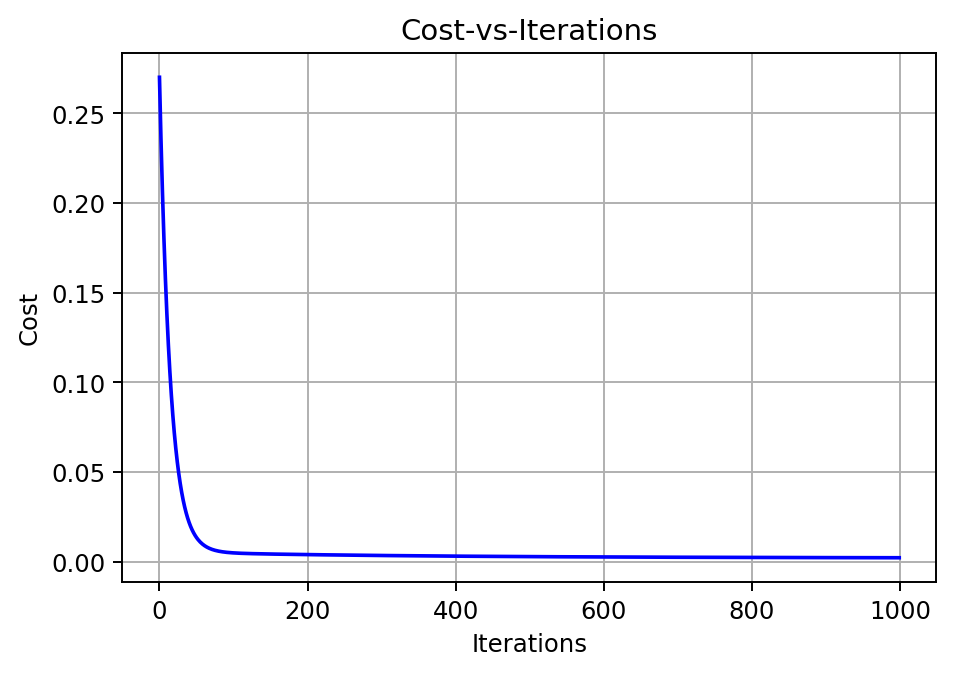

In [20]:
plotter('Iterations','Cost','Cost-vs-Iterations',iteration_list,cost_list)


### Validating the Model

In [21]:
predicted , actual = valdidation(x_validate , y_validate ,theta)


[0.78493546]
[0.73]
-----------
[0.90628]
[0.92]
-----------
[0.79056266]
[0.68]
-----------
[0.46560043]
[0.58]
-----------
[0.6993688]
[0.77]
-----------
[0.80309709]
[0.78]
-----------
[0.76223932]
[0.8]
-----------
[0.55510559]
[0.42]
-----------
[0.57398886]
[0.62]
-----------
[0.92453372]
[0.93]
-----------
[0.94236726]
[0.95]
-----------
[0.60427138]
[0.68]
-----------
[0.96632611]
[0.94]
-----------
[0.73538718]
[0.8]
-----------
[0.61603867]
[0.68]
-----------
[0.96844707]
[0.93]
-----------
[0.49697576]
[0.52]
-----------
[0.86306102]
[0.9]
-----------
[0.77921047]
[0.82]
-----------
[0.84499166]
[0.85]
-----------
[0.70807329]
[0.71]
-----------
[0.75730969]
[0.73]
-----------
[0.50191604]
[0.6]
-----------
[0.93824753]
[0.89]
-----------
[0.98000803]
[0.96]
-----------
[0.71872906]
[0.78]
-----------
[0.84007877]
[0.79]
-----------
[0.72483626]
[0.79]
-----------
[0.85304831]
[0.86]
-----------
[0.79065568]
[0.76]
-----------
[0.62895581]
[0.57]
-----------
[0.7483472]
[0.7

### Mean Square Error

In [22]:
MSE(predicted , actual)


0.005581273277559692

### Mean Absolute Error

In [23]:
MAE(predicted , actual)


0.056543852089422496

### Mean Absolute Percentage Error

In [24]:
MAPE(predicted , actual)


9.001183036233458

### Plotting the Residual 

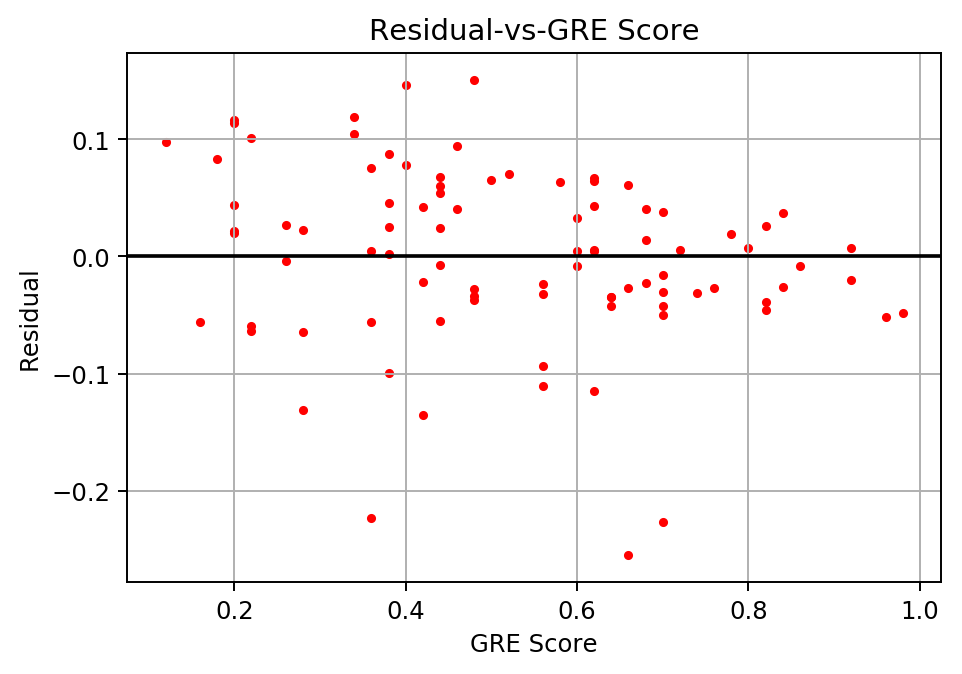

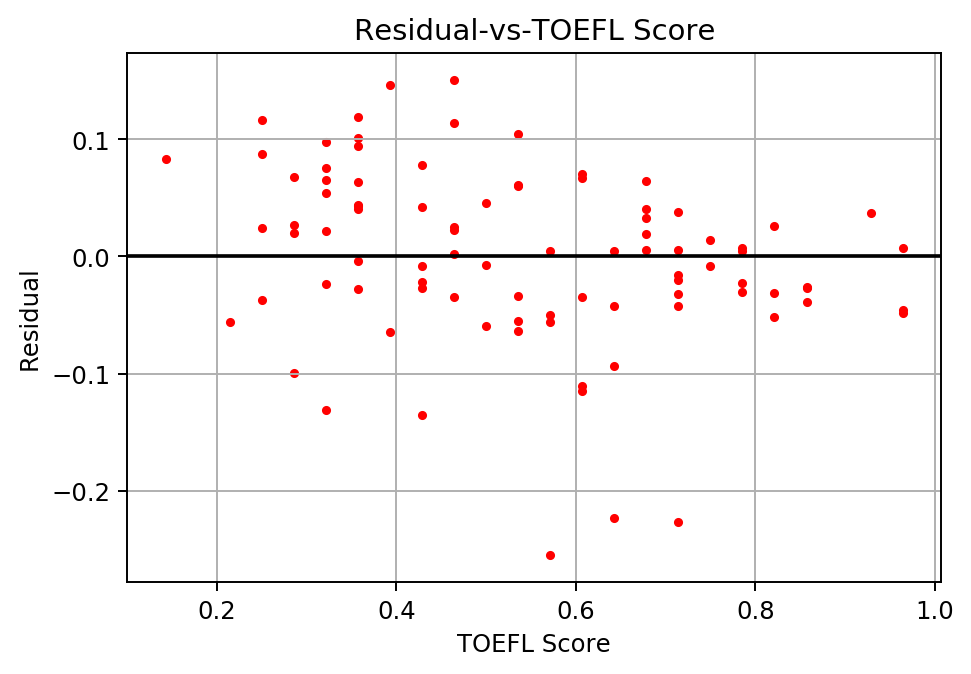

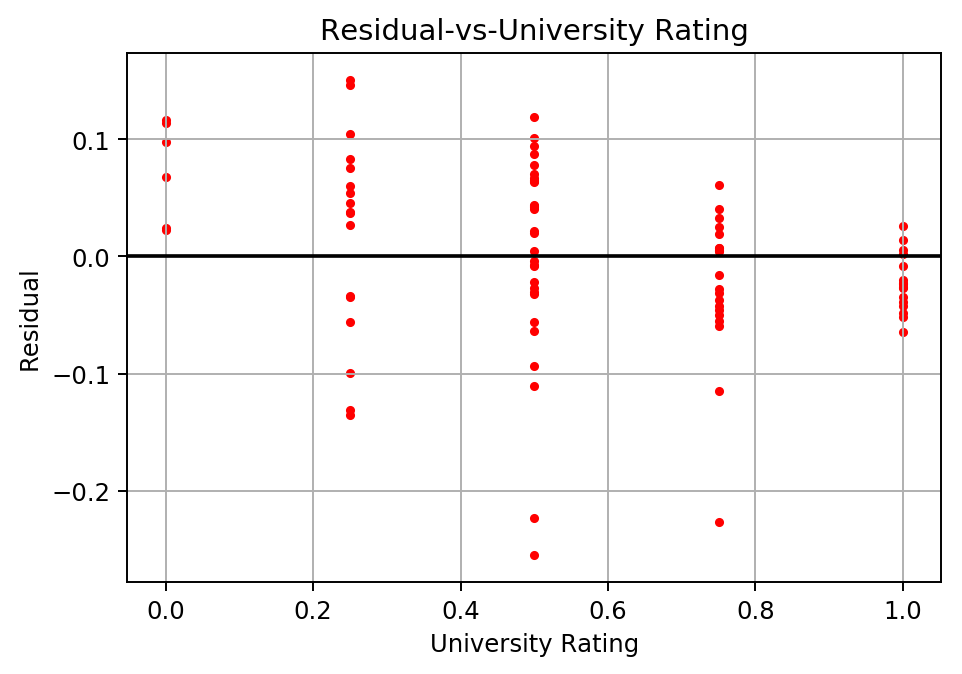

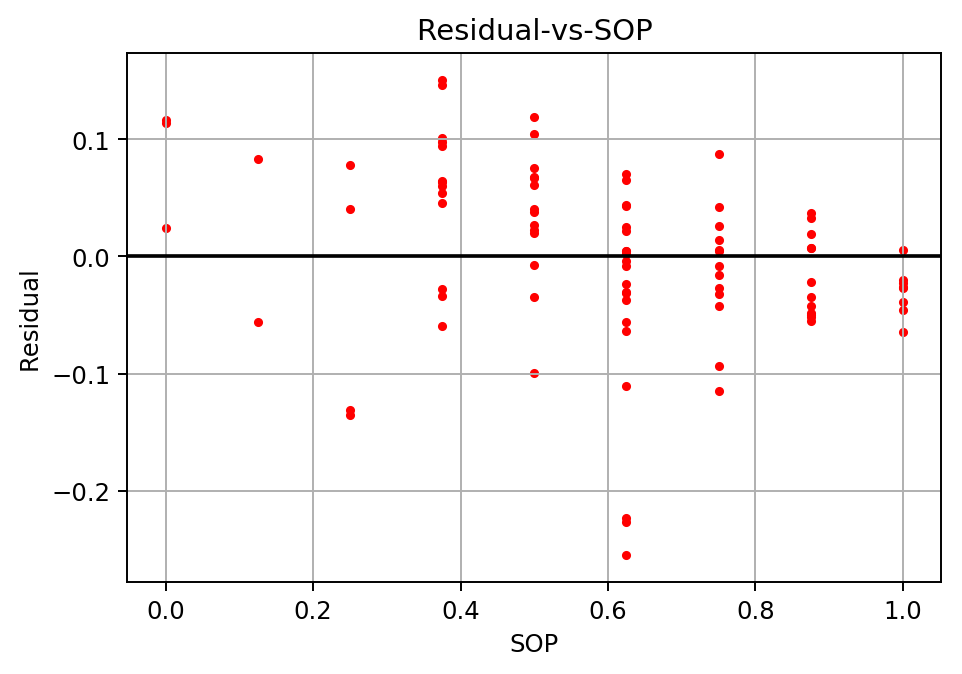

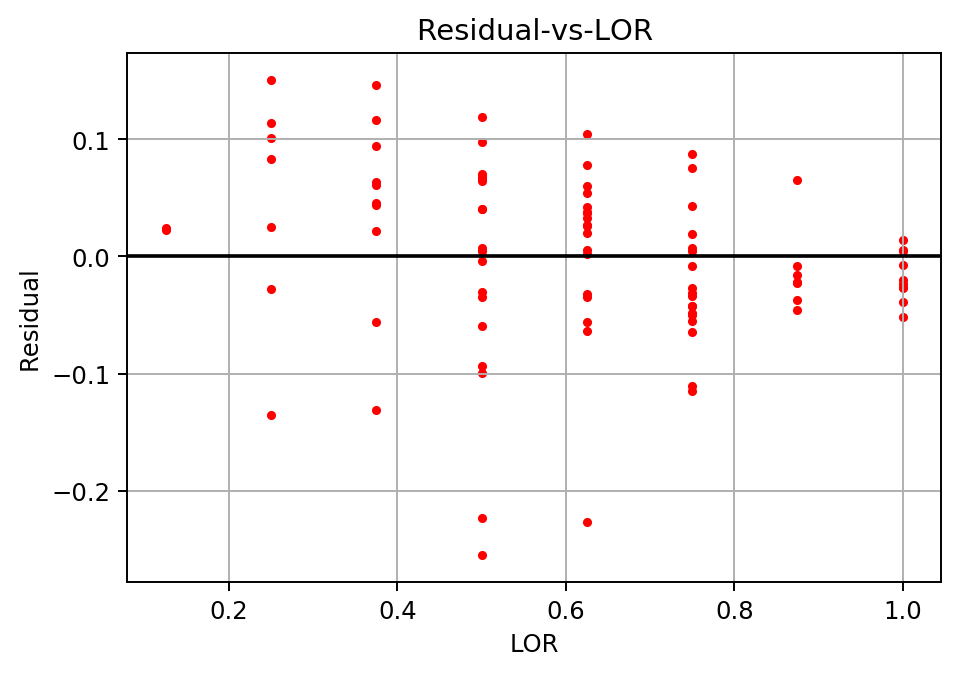

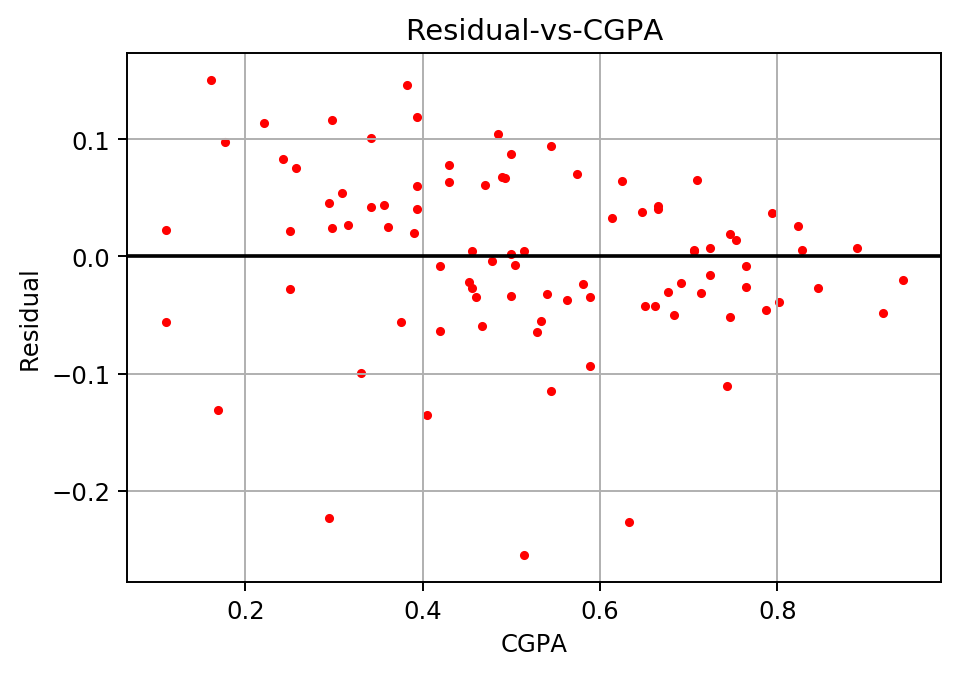

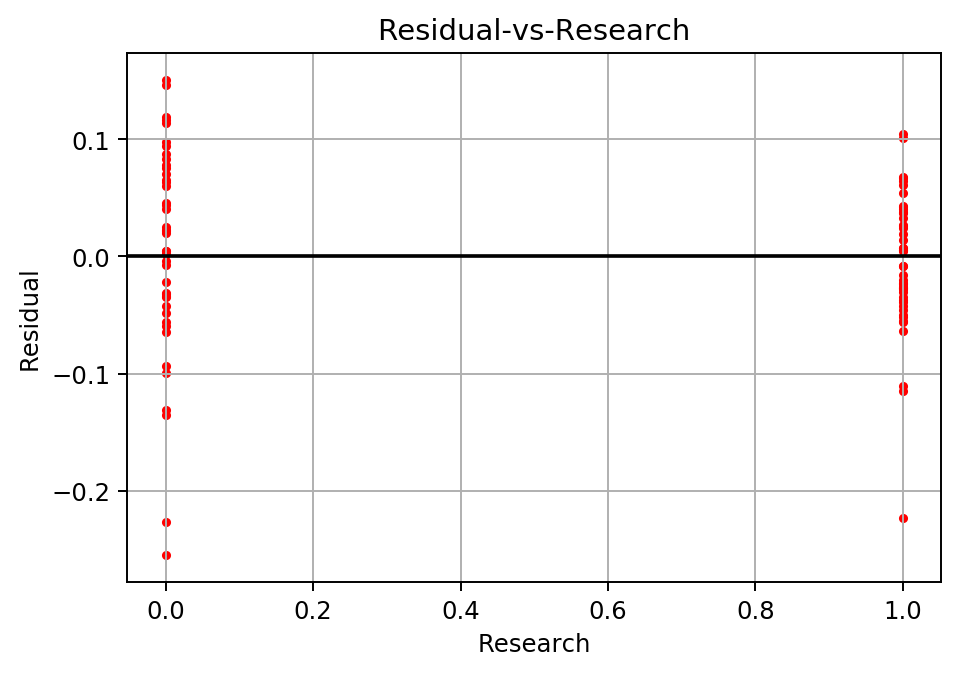

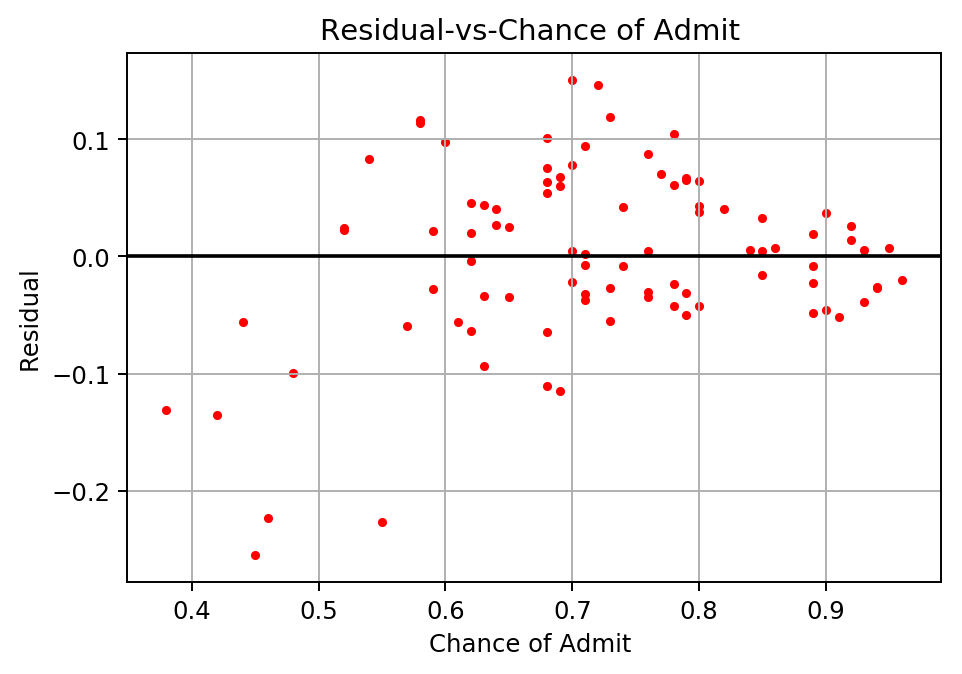

In [25]:
ResidualPlotter(validationSet, predicted , actual)


#### TESTING function resturns list of output

In [26]:
def TESTING_algo(testingSet):
    global theta
    predicted = []
    for index, row in testingSet.iterrows():
        predicted.append(hypothesis_hx(theta, row))
    return predicted

### TEST YOUR DATASET HERE....


In [27]:
def test(arr):
    length = len(arr)
    global columns
    if length == 2:
        testSetPath = arr[1]
        testingData = pd.read_csv(testSetPath)
        res = TESTING_algo(testingData)
        testingData['RESULT'] = res
        testingData.to_csv("./../output_data/q-3_data_output.csv",index = False)
    return testingData

In [28]:
test(sys.argv)

NameError: name 'sys' is not defined

### Observations
#### 1) The error value ( which is calculated as the cost function in the code), becomes constant after 800 iterations.
#### 2) Since the range of output label is very small, it makes the mean square error even smaller which is why the mean absolute error is greater than MSE.
#### 3) The CGPA column  gives the best resdiual error distribution.
